# EyeSwipe2 Calibration Problems

Some participants had significant calibration problems during the experiment. In this document we discuss how they were detected based on the produced data.

In [21]:
%matplotlib notebook
# Imports
import pandas as pd
from data_handler import load_data, compute_mean_values, DataPlotter

typing_df, gesture_df, layout_df, participants = load_data()


## Deletion time

The time after a word was typed until it was deleted, in milliseconds, is shown in the next figure. Only the deleted letters are considered. We can see that there are some sessions with high (more than 10 seconds) mean deletion time.

During the experiment we observed that A13 had problems with the calibration, especially in session 9. This observation is confirmed in the plot below.

<IPython.core.display.Javascript object>


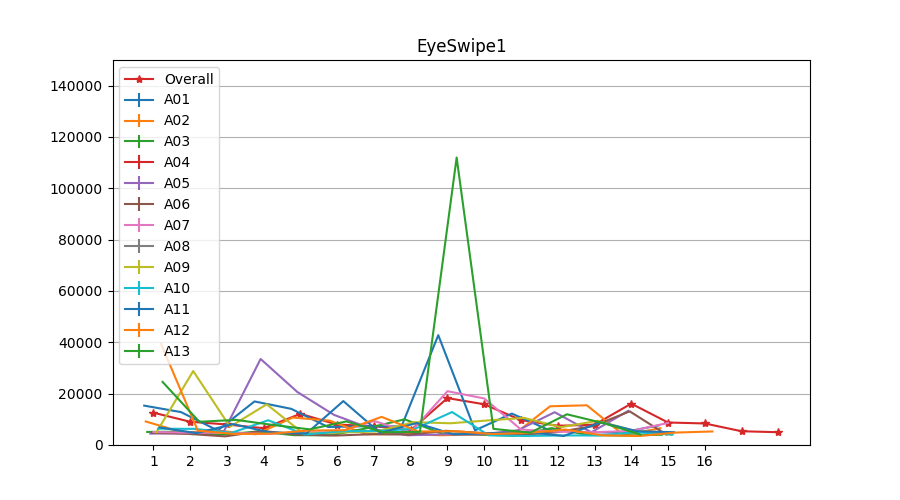

<IPython.core.display.Javascript object>


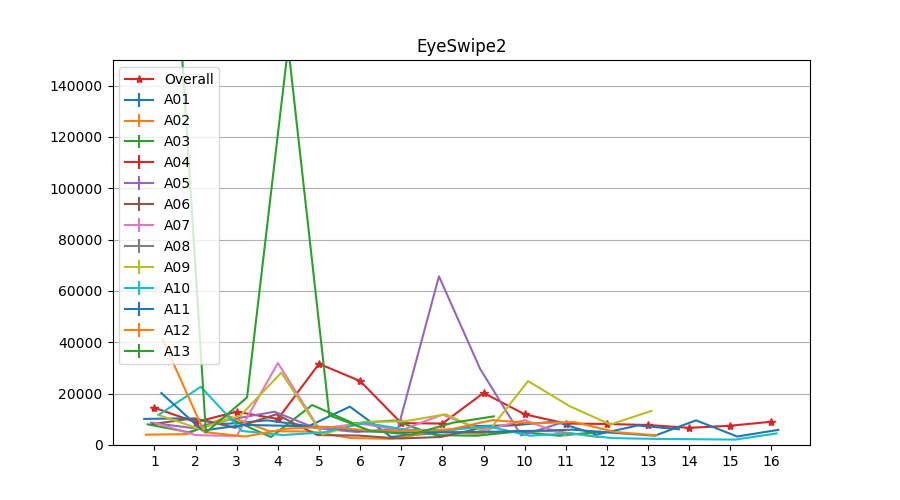

In [22]:
gesture_df['deletion_time'] = gesture_df['delete_tstamp'] - gesture_df['end_tstamp']
deleted_words = gesture_df[gesture_df['delete_tstamp'] > 0]

DataPlotter('deletion_time', deleted_words, participants).show(ylim=(0, 150000))

# Remove trials with high (> 10 s) deletion times
# TODO TRIAL_ID is not unique!! It is only unique for the same participant :(
trials_to_remove = gesture_df[gesture_df['deletion_time'] > 10].trial_id.unique()
unfiltered_gestures = gesture_df
unfiltered_typing = typing_df
gesture_df = gesture_df.drop(gesture_df['trial_id'].isin(trials_to_remove))
typing_df = typing_df.drop(typing_df['trial_id'].isin(trials_to_remove))

## Cancel rate

The cancel rate is computed as $\frac{CAN}{TPD}$. Where $CAN$ is the number of canceled words and $TPD$ is the number of typed words, which includes canceled, deleted and completed words.

<IPython.core.display.Javascript object>


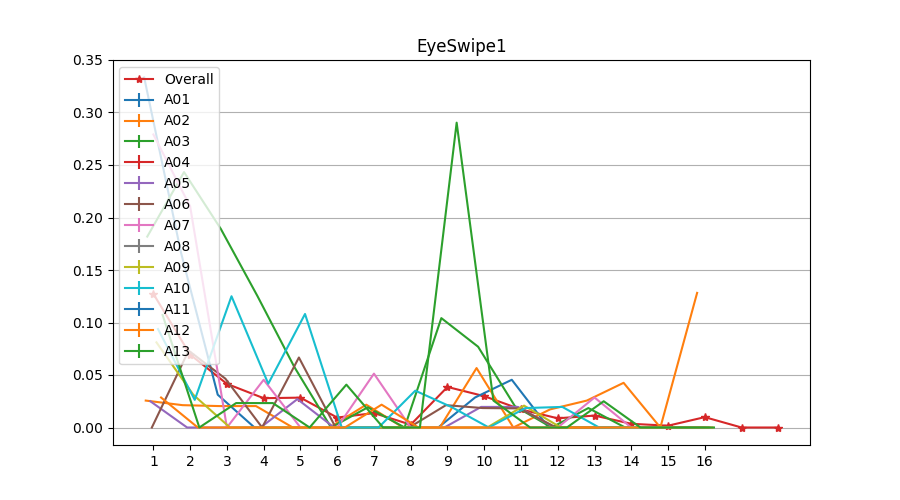

<IPython.core.display.Javascript object>


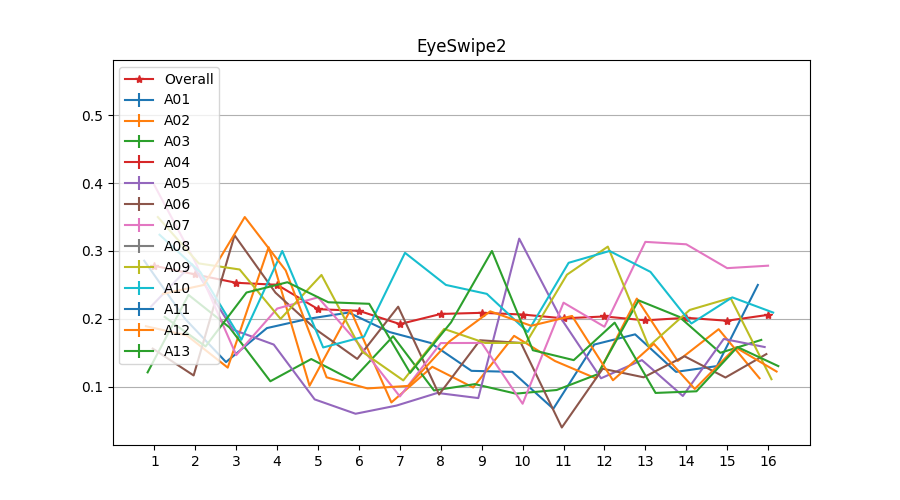

In [23]:
# Create dataframe with typed word count
tpd = gesture_df.groupby(('participant_id', 'mode_id', 'session_id')).size()
tpd = tpd.reset_index()
tpd.rename(columns={0: 'typed'}, inplace=True)

# Add canceled
can = gesture_df[gesture_df['status'] == 'CANCELED'].groupby(('participant_id', 'mode_id', 'session_id'))['status'].count()
tpd = pd.merge(tpd, can.reset_index(), how='left', on=['participant_id', 'mode_id', 'session_id'])
tpd.rename(columns={'status': 'canceled'}, inplace=True)

# Add completed
cmp = gesture_df[gesture_df['status'] == 'COMPLETED'].groupby(('participant_id', 'mode_id', 'session_id'))['status'].count()
tpd = pd.merge(tpd, cmp.reset_index(), how='left', on=['participant_id', 'mode_id', 'session_id'])
tpd.rename(columns={'status': 'completed'}, inplace=True)

# Add deleted
dlt = gesture_df[gesture_df['status'] == 'DELETED'].groupby(('participant_id', 'mode_id', 'session_id'))['status'].count()
tpd = pd.merge(tpd, dlt.reset_index(), how='left', on=['participant_id', 'mode_id', 'session_id'])
tpd.rename(columns={'status': 'deleted'}, inplace=True)

# Compute rates
tpd = tpd.fillna(0)
tpd['cancel rate'] = tpd['canceled'] / tpd['typed']
tpd['complete rate'] = tpd['completed'] / tpd['typed']
tpd['delete rate'] = tpd['deleted'] / tpd['typed']

DataPlotter('cancel rate', tpd, participants).show()

## Delete rate

Similarly, the delete rate is computed as $\frac{DEL}{TPD}$. Where $DEL$ is the number of deleted words.

<IPython.core.display.Javascript object>


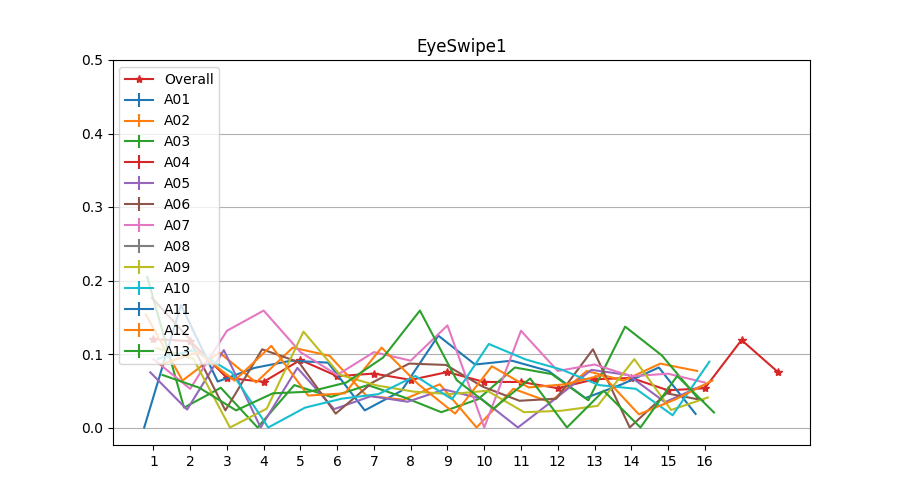

<IPython.core.display.Javascript object>


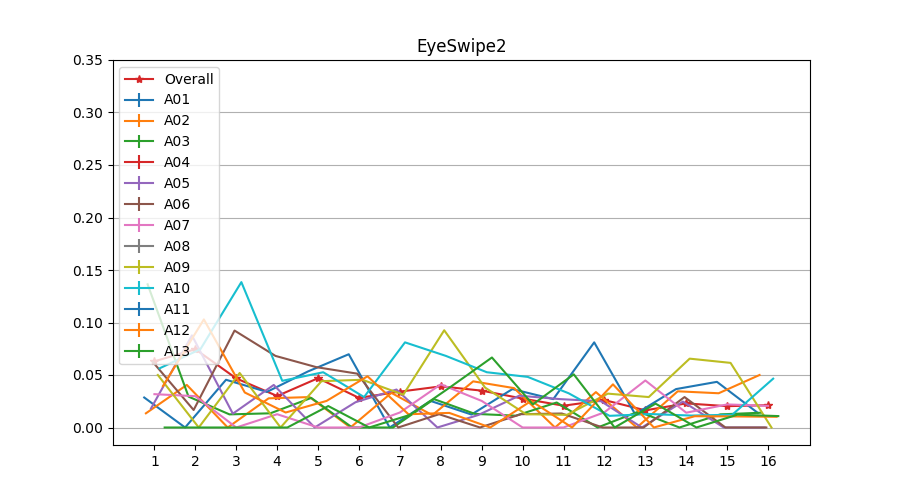

In [24]:
DataPlotter('delete rate', tpd, participants).show()

## Completion rate

Similarly, the completion rate is computed as $\frac{CMP}{TPD}$. Where $CMP$ is the number of completed words.

<IPython.core.display.Javascript object>


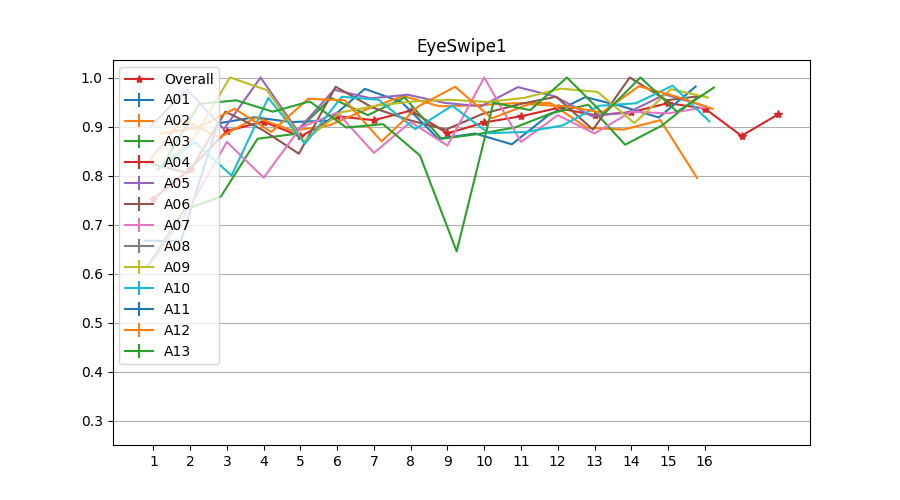

<IPython.core.display.Javascript object>


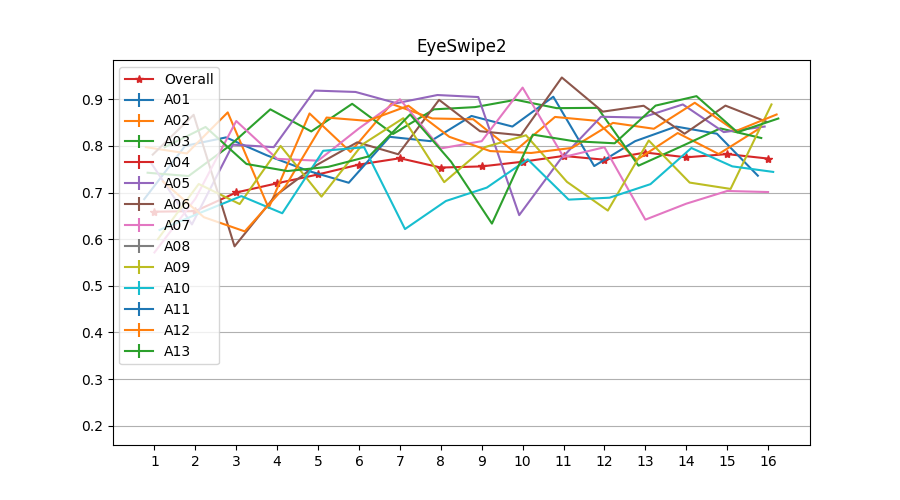

In [25]:
DataPlotter('complete rate', tpd, participants).show()

## Key distances

The key distance metric is computed from the layout experiment data. The key distance between two letters is the length of the shortest path between one key to the other on the QWERTY keyboard. For instance, the neighbors of `S` are `A`, `W`, `E`, `D`, `Z`, `X`. The following figure shows the average key distance per participant and session.

<IPython.core.display.Javascript object>


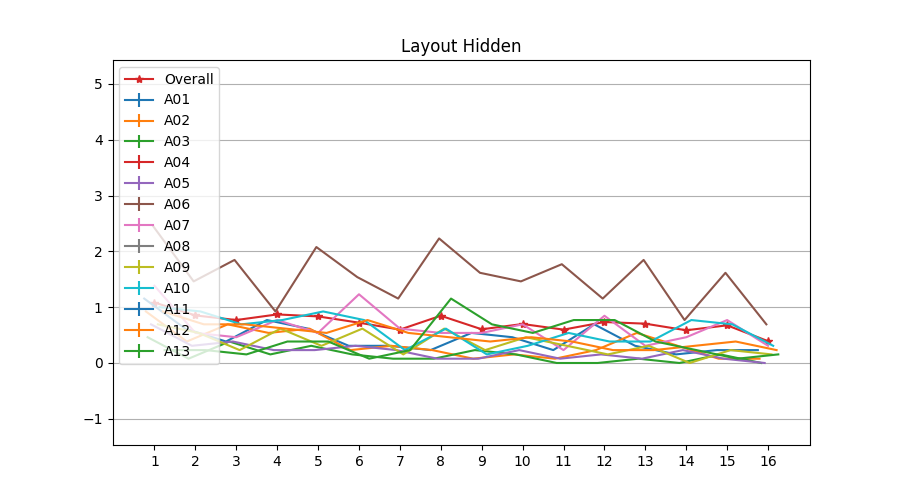

<IPython.core.display.Javascript object>


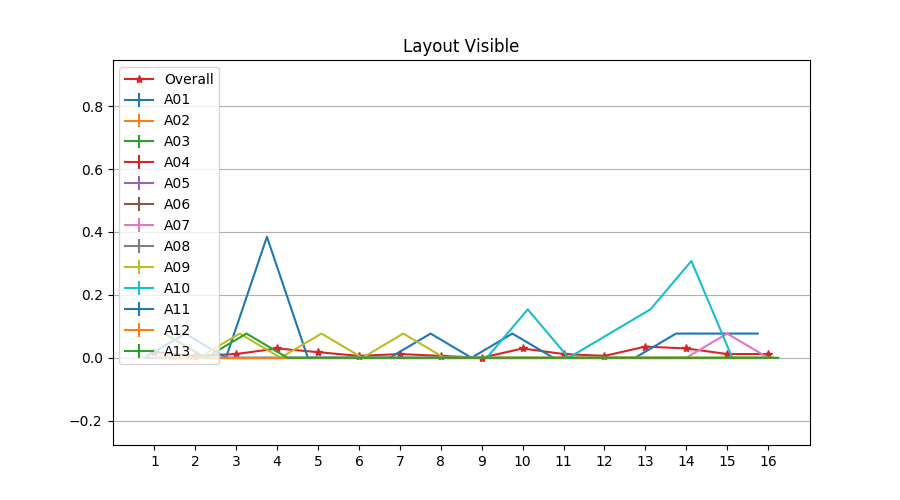

In [26]:
DataPlotter('key_distance', layout_df, participants).show()

## Gesture duration

The gesture duration is computed as the time since the begining of the gesture until the final word is selected. The final word is the word that was selected among the displayed candidates.

<IPython.core.display.Javascript object>


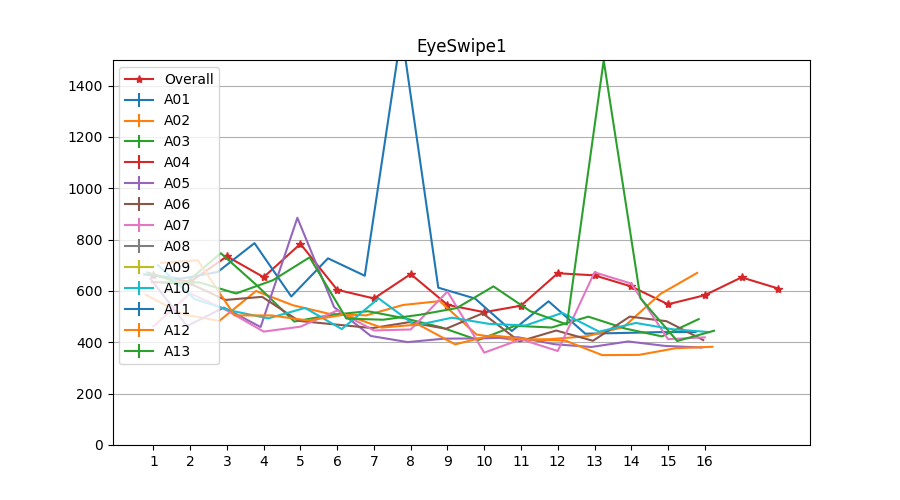

<IPython.core.display.Javascript object>


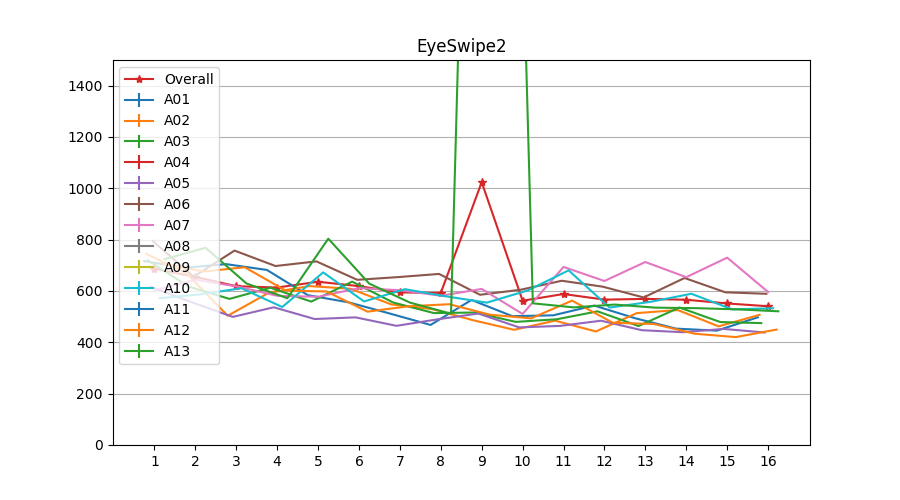

In [27]:
gesture_df['duration'] = gesture_df.end_tstamp - gesture_df.start_tstamp
gesture_df['duration_per_char'] = gesture_df.duration / gesture_df.word.str.len()
completed_gestures = gesture_df[gesture_df['status'] == 'COMPLETED']
DataPlotter('duration_per_char', completed_gestures, participants).show(ylim=(0, 1500))

# Excluding participants' data

Participants A04, A08, A09, and A11 had significant calibration problems, as can be observed in the plots above. For this reason we removed their data from the analysis.